In [2]:
import numpy as np

In [3]:
a = np.zeros((2,3),dtype =np.float32)

In [4]:
print(a)

[[0. 0. 0.]
 [0. 0. 0.]]


In [5]:
type(a)

numpy.ndarray

In [6]:
a.__class__

numpy.ndarray

In [7]:
a2 = np.zeros((2,3,4),dtype =np.float32)

In [8]:
print(a2)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [9]:
a2+=1
print(a2)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


In [10]:
ones =lambda *shape: np.ones(shape,dtype = np.float32)

In [11]:
ones(4,5)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [12]:
my_input = [ones(2,3),'+',ones(2,3),'=',ones(2,3)*2]
print(my_input)
print(*my_input)
display(*my_input)

[array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32), '+', array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32), '=', array([[2., 2., 2.],
       [2., 2., 2.]], dtype=float32)]
[[1. 1. 1.]
 [1. 1. 1.]] + [[1. 1. 1.]
 [1. 1. 1.]] = [[2. 2. 2.]
 [2. 2. 2.]]


array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

'+'

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

'='

array([[2., 2., 2.],
       [2., 2., 2.]], dtype=float32)

In [13]:
lines=[str(a).split('\n')for a in my_input];lines

[['[[1. 1. 1.]', ' [1. 1. 1.]]'],
 ['+'],
 ['[[1. 1. 1.]', ' [1. 1. 1.]]'],
 ['='],
 ['[[2. 2. 2.]', ' [2. 2. 2.]]']]

In [14]:
max_lines = max([len(line)for line in lines])

In [15]:
print(max_lines)

2


In [16]:
lines =[line+[' ']*(max_lines-len(line))for line in lines]

In [17]:
print(lines)

[['[[1. 1. 1.]', ' [1. 1. 1.]]'], ['+', ' '], ['[[1. 1. 1.]', ' [1. 1. 1.]]'], ['=', ' '], ['[[2. 2. 2.]', ' [2. 2. 2.]]']]


In [18]:
lines_arr=np.array(lines)

In [19]:
print(lines_arr.T)

[['[[1. 1. 1.]' '+' '[[1. 1. 1.]' '=' '[[2. 2. 2.]']
 [' [1. 1. 1.]]' ' ' ' [1. 1. 1.]]' ' ' ' [2. 2. 2.]]']]


In [20]:
width=[len(x)for x in lines];print(width)

[2, 2, 2, 2, 2]


In [21]:
lines_arr.flatten().shape

(10,)

In [22]:
width =np.array([len(x) for x in  lines_arr.flatten()]);display(width)

array([11, 12,  1,  1, 11, 12,  1,  1, 11, 12])

In [23]:
width = width.reshape(len(lines_arr),-1);display(width)

array([[11, 12],
       [ 1,  1],
       [11, 12],
       [ 1,  1],
       [11, 12]])

In [24]:
 np.max(width)

12

In [25]:
width

array([[11, 12],
       [ 1,  1],
       [11, 12],
       [ 1,  1],
       [11, 12]])

In [26]:
width.max(axis=1)

array([12,  1, 12,  1, 12])

In [27]:
def fmt_items(lines,max_lines=0):
    max_width=max([len(line)for line in lines])
    empty =' '*max_width
    lines = [line.ljust(max_width)for line in lines]
    lines += [empty]*(max_lines - len(lines))
    return lines
results =fmt_items(str(np.arange(1,5,1).reshape(2,-1)).split('\n'),max_lines=3)
print('\n'.join(results))

[[1 2] 
 [3 4]]
       


In [28]:
def pp (*list):
    lines = [ str(item).split('\n') for item in list]
    max_lines=max([len(item)for  item in lines])
    lines = [fmt_items(item,max_lines=max_lines)for item in lines]
    lines_t= np.array(lines).T
    print('\n'.join([' '.join(line) for  line in lines_t]))
pp(*my_input)

[[1. 1. 1.]  + [[1. 1. 1.]  = [[2. 2. 2.] 
 [1. 1. 1.]]    [1. 1. 1.]]    [2. 2. 2.]]


In [29]:
A=np.arange(1,11).reshape(5,2)
print(A)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


In [30]:
B=np.linspace(10,30,10).reshape(5,2)
print(B)

[[10.         12.22222222]
 [14.44444444 16.66666667]
 [18.88888889 21.11111111]
 [23.33333333 25.55555556]
 [27.77777778 30.        ]]


In [31]:
R=A * B
pp(A, '*',B, '=',R)

[[ 1  2]  * [[10.         12.22222222]  = [[ 10.          24.44444444] 
 [ 3  4]     [14.44444444 16.66666667]     [ 43.33333333  66.66666667] 
 [ 5  6]     [18.88888889 21.11111111]     [ 94.44444444 126.66666667] 
 [ 7  8]     [23.33333333 25.55555556]     [163.33333333 204.44444444] 
 [ 9 10]]    [27.77777778 30.        ]]    [250.         300.        ]]


In [32]:
import operator
def op(x,name,y,func):
    r =func(x,y)
    pp(x,name,y,'=',r)
op(np.array([[1,2],[3,4]]),'+',np.array([[5,6],[7,8]]),operator.add)

[[1 2]  + [[5 6]  = [[ 6  8] 
 [3 4]]    [7 8]]    [10 12]]


In [33]:
class Op:
    def __init__(self,name,func):
        self.name = name
        self.func = func
    def __call__ (self,x,y):
        r =self.func(x,y)
        pp(x,self.name,y,'=',r)
        
SSum = Op('+',lambda x,y:x+y)
SMul = Op('*',lambda x,y:x*y)
MMul = Op('@',lambda x,y:x@y)
SMul(A,B)

[[ 1  2]  * [[10.         12.22222222]  = [[ 10.          24.44444444] 
 [ 3  4]     [14.44444444 16.66666667]     [ 43.33333333  66.66666667] 
 [ 5  6]     [18.88888889 21.11111111]     [ 94.44444444 126.66666667] 
 [ 7  8]     [23.33333333 25.55555556]     [163.33333333 204.44444444] 
 [ 9 10]]    [27.77777778 30.        ]]    [250.         300.        ]]


In [34]:
MMul(A.T,B)

[[ 1  3  5  7  9]  @ [[10.         12.22222222]  = [[561.11111111 616.66666667] 
 [ 2  4  6  8 10]]    [14.44444444 16.66666667]     [655.55555556 722.22222222]]
                      [18.88888889 21.11111111]                                 
                      [23.33333333 25.55555556]                                 
                      [27.77777778 30.        ]]                                


# Broadcast and stack

In [35]:
SSum(A,B[0])

[[ 1  2]  + [10.         12.22222222] = [[11.         14.22222222] 
 [ 3  4]                                 [13.         16.22222222] 
 [ 5  6]                                 [15.         18.22222222] 
 [ 7  8]                                 [17.         20.22222222] 
 [ 9 10]]                                [19.         22.22222222]]


In [36]:
SMul(A,B[0])

[[ 1  2]  * [10.         12.22222222] = [[ 10.          24.44444444] 
 [ 3  4]                                 [ 30.          48.88888889] 
 [ 5  6]                                 [ 50.          73.33333333] 
 [ 7  8]                                 [ 70.          97.77777778] 
 [ 9 10]]                                [ 90.         122.22222222]]


In [37]:
SMul(A,np.stack(list(B[0:1])*5))

[[ 1  2]  * [[10.         12.22222222]  = [[ 10.          24.44444444] 
 [ 3  4]     [10.         12.22222222]     [ 30.          48.88888889] 
 [ 5  6]     [10.         12.22222222]     [ 50.          73.33333333] 
 [ 7  8]     [10.         12.22222222]     [ 70.          97.77777778] 
 [ 9 10]]    [10.         12.22222222]]    [ 90.         122.22222222]]


# Binary and logical operations

In [38]:
pp(A,A>3,B,B>=10.)

[[ 1  2]  [[False False]  [[10.         12.22222222]  [[ True  True] 
 [ 3  4]   [False  True]   [14.44444444 16.66666667]   [ True  True] 
 [ 5  6]   [ True  True]   [18.88888889 21.11111111]   [ True  True] 
 [ 7  8]   [ True  True]   [23.33333333 25.55555556]   [ True  True] 
 [ 9 10]]  [ True  True]]  [27.77777778 30.        ]]  [ True  True]]


In [39]:
pp(np.isclose(B,10),(10 - 1e-7 <= B)& (B<=10+1e-7))

[[ True False]  [[ True False] 
 [False False]   [False False] 
 [False False]   [False False] 
 [False False]   [False False] 
 [False False]]  [False False]]


In [40]:
idx = np.isclose(B,10)| np.isclose(B,30)
B[idx]

array([10., 30.])

# Random

In [41]:
pp(np.random.uniform(0,1),np.random.randn(2,3),np.random.rand(2,3))

0.33918238726977856 [[ 1.26516998 -0.4406521   0.93747468]  [[0.54399224 0.40307357 0.24105942] 
                     [ 0.40648201 -1.24758096  1.42956197]]  [0.07272452 0.48251477 0.31774667]]


In [42]:
import random
random.seed(10)
np.random.seed(10)
nr= np.random.uniform(0,1)
nr2= np.random.uniform(0,1)
rr = random.uniform(0,1)
rr2 = random.uniform(0,1)
pp(nr,rr,nr2,rr2)


0.771320643266746 0.5714025946899135 0.0207519493594015 0.4288890546751146


# Matplotlib

In [43]:
import matplotlib 
matplotlib.rcParams['axes.grid']=False
import matplotlib.pyplot as plt
x=np.linspace(0,10,11)
dotes = np.random.randn(11)
plt.plot(x,dotes)

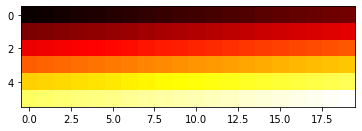

In [44]:
plt.imshow(np.arange(0,120).reshape(6,20),'hot');

In [45]:
a = 'Кот сидел на крыше тише мыши'
print(a)

Кот сидел на крыше тише мыши


In [46]:
from collections import Counter
Counter(list(a)).most_common()

[(' ', 5),
 ('и', 3),
 ('е', 3),
 ('ш', 3),
 ('т', 2),
 ('ы', 2),
 ('К', 1),
 ('о', 1),
 ('с', 1),
 ('д', 1),
 ('л', 1),
 ('н', 1),
 ('а', 1),
 ('к', 1),
 ('р', 1),
 ('м', 1)]

In [47]:
counter = {}
for ch in list(a.lower()):
    if ch ==' ':continue
    if ch in counter:
        counter [ch]+=1
    else:
        counter [ch] = 1
pp(sorted(counter.items(),key = lambda x: x[1]))

[('о', 1), ('с', 1), ('д', 1), ('л', 1), ('н', 1), ('а', 1), ('р', 1), ('м', 1), ('к', 2), ('т', 2), ('ы', 2), ('и', 3), ('е', 3), ('ш', 3)]
